<a href="https://colab.research.google.com/github/DiwakarChaurasia/My-works/blob/main/Task_1_The_Sparks_Foundation_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction Using Supervised Machine Learning**

*Predict the percentage of the students based on the number of study hours. What will be the predicted score if a student studies for 9.25 hrs/day?*

Author: **Diwakar Chaurasia** (Intern at The Sparks Foundation)

**Importing All The Required Libraries**

In [6]:
import pandas as pd #for data analyses
import numpy as np  #for linear algebra
import seaborn as sns #for data visualization

**Reading The Data**

In [7]:
link_data = "http://bit.ly/w-data"
data = pd.read_csv(link_data)

In [8]:
data.info()        #This tells us about the number of rows & columns in our data & the data type of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [11]:
data.shape        #This tells about the number of rows & columns in the given data

(25, 2)

In [12]:
data.isnull().sum()       

Hours     0
Scores    0
dtype: int64

**Data Visualization**

In [13]:
import matplotlib.pyplot as plt #for plotting graphs
%matplotlib inline

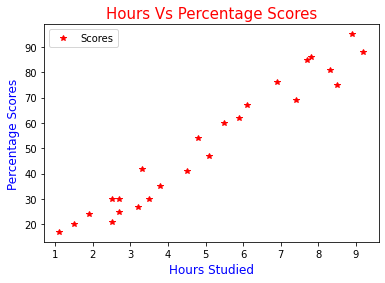

In [34]:
data.plot("Hours","Scores", style = "*", color = "red")
plt.title("Hours Vs Percentage Scores", fontsize = 15, color = "Red")
plt.xlabel("Hours Studied", fontsize = 12, color = "Blue" )
plt.ylabel("Percentage Scores", fontsize = 12, color = "Blue")
plt.show()

So Clearly, from the above graph we can observe that there is a positive linear relationship between the two variables i.e. scores are increasing per hour.

**Data Preparation**

In [24]:
x = data.iloc[:, :-1].values
y = data.iloc[:,1].values

Here we have divided the data into attributes & labels.

**Split The Dataset**

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.2, random_state = 0)

In [67]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training Completed!")

Training Completed!


**Plotting The Linear Regression Line**

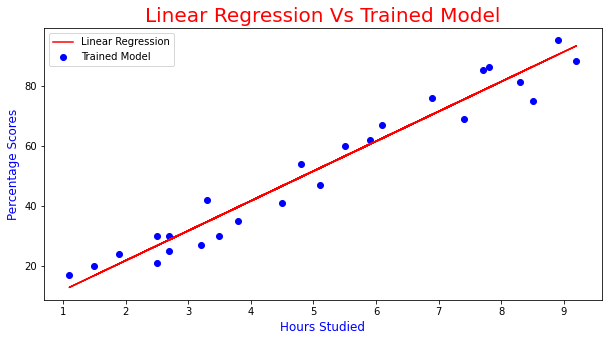

In [68]:
line = regressor.coef_* x+regressor.intercept_
plt.figure(figsize = (10,5))
plt.title("Linear Regression Vs Trained Model", fontsize = 20, color = "Red")
plt.scatter(x,y, label = "Trained Model", color = "Blue")
plt.plot(x, line, label = "Linear Regression", color = "Red")
plt.xlabel("Hours Studied", color = "Blue", fontsize = 12)
plt.ylabel("Percentage Scores", color = "Blue", fontsize = 12)
plt.legend(loc = 2)
plt.show()

**Predicting Scores**

In [69]:
print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Comparing Actual Vs Predicted**

In [70]:
df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


***Testing with the provided data*** (***What will be the predicted score if a student studies for 9.25 hrs/day ?***)


In [71]:
regressor.predict([[9.25]]) 

array([93.69173249])

Predected score for a student who studies for 9.25 hrs/day is 93.69 

***You can also test with your own data***

In [72]:
hours = ([8],[9.25],[9.7],[11])
hours = pd.DataFrame(hours)
own_pred = regressor.predict(hours)
own_pred = pd.DataFrame(own_pred)
new_data = pd.concat([hours,own_pred], axis =1, keys = ['Hours','Predicted Score'])
new_data

,Hours,Predicted Score
,0,0
0,8.00,81.303412
1,9.25,93.691732
2,9.70,98.151528
3,11.00,111.035381
